# 4章 ニューラルネットワークの学習

## 損失関数
### 二乗和誤差

In [ ]:
import numpy as np

# t: 教師データ
# index 2を正解とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# y: ニューラルネットワークの出力
# 例1.「2」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 二乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

# np.arrayはsumに渡すために変換をしている
mean_squared_error(np.array(y), np.array(t))
# => 0.0975000...31

# 例2.「7」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))
# => 0.59750...3

# 2つの結果でわかることは、教師データとの誤差を表している
# 例1の結果のほうが値が小さいので誤差が小さいことがわかる。


### 交差エントロピー誤差

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
a = cross_entropy_error(np.array(y), np.array(t))
print(a)
# => 0.510825457099

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
b = cross_entropy_error(np.array(y), np.array(t))
print(b)
# => 2.30258409299


# こちらも1番目の結果の方が値が小さいので誤差が小さいと判断する

In [ ]:
np.random.choice(60000, 10)

In [ ]:
import numpy as np
import sys, os
sys.path.append(os.getcwd() + '/oreilly')
from dataset.mnist import load_mnist

# y : ニューラルネットワーク出力
# t : 教師データ
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, t.size)
        
    batch_size = y.shape[0]
    # バッチ枚数で正規化し、1枚あたりの平均の交差エントロピー誤差を計算する
    return -np.sum(t * np.log(y + delta)) / batch_size

# load_mnist内の関数（_change_one_hot_label）の定義側にtypoがあった
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print('batch_mask : %s', batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('x_batch : %s', x_batch)
print('t_batch : %s', t_batch)


# 数値微分の例


In [28]:
# y = 0.01x^2 + 0.1x

# ↑を関数にしたもの
def f_1(x):
    return (0.01 * x ** 2) + (0.1 * x)

In [49]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = f_1(x)

plt.title("f(x) = 0.01x^2 + 0.1x ")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

NameError: name 'f_1' is not defined

In [47]:
# f_1関数の微分をx=5, x=10の時にそれぞれで計算する

# 数値微分 中心差分
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    print("numerical_diff x : ", x)
    return (f(x + h) - f(x - h)) / (2 * h)

In [26]:
numerical_diff(f_1, 5)

numerical_diff x :  5


0.1999999999990898

In [27]:
numerical_diff(f_1, 10)

numerical_diff x :  10


0.2999999999986347

# 偏微分

$$ f(x_0, x_1) = x^2_0 + x^2_1 $$

In [44]:
# ↑を実装するこうなる
def f_2(x):
    return x[0] ** 2 + x[1] ** 2

In [45]:
# x0 = 3, x1 = 4のときのx0に対する偏微分を求める
def function_tmp1(x0):
    tmp = x0*x0 + 4.0 ** 2.0
    print("tmp1 : %s", tmp)
    return tmp

In [48]:
numerical_diff(function_tmp1, 3.0)

numerical_diff x :  3.0
tmp1 : %s 25.00060001
tmp1 : %s 24.99940001


6.00000000000378

# 勾配

In [12]:
import numpy as np

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
#     print("x : %s", x)
#     print("grad : %s", grad)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # 今回は f(x, y) = x^2 + y^2
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値をもとに戻す
        
    return grad

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


In [19]:
# => [6 8] xとyの偏微分の結果のベクトルがかえる
numerical_gradient(f_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [20]:
numerical_gradient(f_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [21]:
numerical_gradient(f_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

# 勾配法

In [15]:
# f : 最適化したい関数
# init_x : 初期値
# lr(learning rate) : 学習率
# step_num : 勾配法による繰り返しの数
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        # numerical_gradientで求めた勾配に学習率をかけた値で更新する処理をstep_num回数繰り返す
        x -= lr * grad
            
    return x

In [16]:
# f(x0, x1) = x0^2 + x1^2 の最小値を勾配法で求める
init_x = np.array([-3.0, 4.0])
gradient_descent(f_2, init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [17]:
# 学習率が大きすぎる例：lr=10.0
gradient_descent(f_2, init_x, lr=10.0, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

In [18]:
# 学習率が小さすぎる例 lr=1e-10
gradient_descent(f_2, init_x, lr=1e-10, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

In [60]:
# 偏微分のグラフ
def function_e0(x0):
    return x0*x0 + 1.0**2.0

x0s = np.arange(-3, 3, 0.5)
X = numerical_diff(function_e0, x0s)

numerical_diff x :  [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]


array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [82]:
def function_e1(x1):
    return (1.0**2.0) + (x1 * x1)

x1s = np.arange(-3, 3, 0.5)
Y = numerical_diff(function_e1, x1s)

numerical_diff x :  [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]


0.010000000000000002


ValueError: Argument Z must be 2-dimensional.

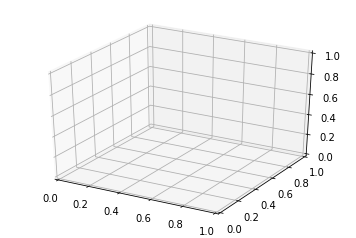

In [83]:
# f(x0, x1) = x0^2 + x1^2 のグラフ

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def f(x0, x1):
    return x[0]**2 + x[1]**2 

x0 = np.arange(-3, 3, 0.5)
x1 = np.arange(-3, 3, 0.5)
x0, x1 = np.meshgrid(x0, x1)
z = f(x0, x1)

print(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x0,x1,z)

plt.show()

[[18.   15.25 13.   11.25 10.    9.25  9.    9.25 10.   11.25 13.   15.25]
 [15.25 12.5  10.25  8.5   7.25  6.5   6.25  6.5   7.25  8.5  10.25 12.5 ]
 [13.   10.25  8.    6.25  5.    4.25  4.    4.25  5.    6.25  8.   10.25]
 [11.25  8.5   6.25  4.5   3.25  2.5   2.25  2.5   3.25  4.5   6.25  8.5 ]
 [10.    7.25  5.    3.25  2.    1.25  1.    1.25  2.    3.25  5.    7.25]
 [ 9.25  6.5   4.25  2.5   1.25  0.5   0.25  0.5   1.25  2.5   4.25  6.5 ]
 [ 9.    6.25  4.    2.25  1.    0.25  0.    0.25  1.    2.25  4.    6.25]
 [ 9.25  6.5   4.25  2.5   1.25  0.5   0.25  0.5   1.25  2.5   4.25  6.5 ]
 [10.    7.25  5.    3.25  2.    1.25  1.    1.25  2.    3.25  5.    7.25]
 [11.25  8.5   6.25  4.5   3.25  2.5   2.25  2.5   3.25  4.5   6.25  8.5 ]
 [13.   10.25  8.    6.25  5.    4.25  4.    4.25  5.    6.25  8.   10.25]
 [15.25 12.5  10.25  8.5   7.25  6.5   6.25  6.5   7.25  8.5  10.25 12.5 ]]


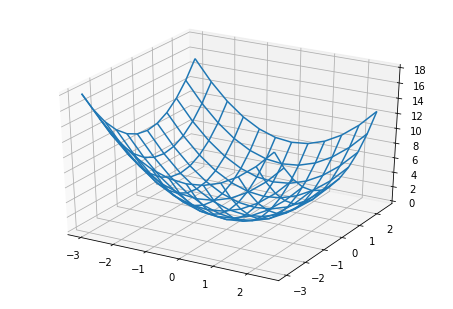

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x0, x1):
    return x0**2 + x1**2

x0 = np.arange(-3, 3, 0.5)
x1 = np.arange(-3, 3, 0.5)
X0, X1 = np.meshgrid(x0, x1)
Y = func(X0, X1)
print(Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X0,X1,Y)
plt.show()